In [1]:
#importer les bilbiotheques 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

2024-05-08 11:42:22.168861: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 11:42:22.282742: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 11:42:22.717300: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 11:42:24.360690: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train', 
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


# Validation Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid', 
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# Building Model

In [4]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=[128, 128, 3] ))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
# cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
# cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
# cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))


## Phase de compilation et d'entrainement

In [12]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     6,145,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,290 (28.20 MB)

 Trainable params: 7,393,290 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8518s 4s/step - accuracy: 0.3695 - loss: 2.2032 - val_accuracy: 0.8071 - val_loss: 0.5940
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8157s 4s/step - accuracy: 0.8215 - loss: 0.5451 - val_accuracy: 0.8555 - val_loss: 0.4416
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 8722s 4s/step - accuracy: 0.8881 - loss: 0.3401 - val_accuracy: 0.9001 - val_loss: 0.3168
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4417s 2s/step - accuracy: 0.9144 - loss: 0.2611 - val_accuracy: 0.8863 - val_loss: 0.3532
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3861s 2s/step - accuracy: 0.9216 - loss: 0.2349 - val_accuracy: 0.8852 - val_loss: 0.3695
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3908s 2s/step - accuracy: 0.9288 - loss: 0.2085 - val_accuracy: 0.8868 - val_loss: 0.3677
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4469s 2s/step - accuracy: 0.9385 - loss: 0.1848 - val_accuracy: 0.8946 - val_loss: 0.3733
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4852s 2s/step - accuracy: 0.9337 -

## Model evaluation 

In [15]:
# Model evaluate on Training set 

train_loss, train_acc = cnn.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1056s 481ms/step - accuracy: 0.9507 - loss: 0.1449


In [25]:
print("Training\n")
print("loss = ",train_loss, " acc = ", train_acc)
#print(f"loss = {train_loss} = {(train_loss:.2f) * 100}%")
#print(f"acc = {train_acc} = {(train_acc:.2f) * 100}%")

Training

loss =  0.12994743883609772  acc =  0.9562273025512695


In [26]:
# Model on Validation set

val_loss, val_acc = cnn.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 264s 480ms/step - accuracy: 0.9100 - loss: 0.3087


In [27]:
print("Validation\n")
print("loss = ",val_loss, " acc = ", val_acc)
#print(f"loss = {train_loss} = {train_loss:.2f * 100}%")
#print(f"acc = {train_acc} = {train_acc:.2f * 100}%")

Validation

loss =  0.3022477924823761  acc =  0.9103118777275085


## Saving model

In [29]:
cnn.save("trained_model.keras")

In [32]:
training_history.history

{'accuracy': [0.5775802135467529,
  0.8441425561904907,
  0.8941034078598022,
  0.9155985713005066,
  0.9210327863693237,
  0.9316309690475464,
  0.9372217059135437,
  0.9347606301307678,
  0.9409204125404358,
  0.9399530291557312],
 'loss': [1.4028714895248413,
  0.47393912076950073,
  0.31921032071113586,
  0.2552857995033264,
  0.23485854268074036,
  0.20470836758613586,
  0.18797944486141205,
  0.19936949014663696,
  0.1806982010602951,
  0.18624214828014374],
 'val_accuracy': [0.8070794343948364,
  0.8555087447166443,
  0.9001252055168152,
  0.8862963914871216,
  0.8851581811904907,
  0.886751651763916,
  0.8946050405502319,
  0.901149570941925,
  0.9012064933776855,
  0.9103118777275085],
 'val_loss': [0.5939806699752808,
  0.44155994057655334,
  0.31675413250923157,
  0.35319849848747253,
  0.3695140779018402,
  0.36766284704208374,
  0.3733203113079071,
  0.3312954604625702,
  0.3351954221725464,
  0.30224770307540894]}

In [33]:
# Recording history on json 

import json
with open("training_hist.json", "w") as f :
    json.dump(training_history.history, f)

In [34]:
training_history.history['accuracy']

[0.5775802135467529,
 0.8441425561904907,
 0.8941034078598022,
 0.9155985713005066,
 0.9210327863693237,
 0.9316309690475464,
 0.9372217059135437,
 0.9347606301307678,
 0.9409204125404358,
 0.9399530291557312]

### Accuracy visualization 

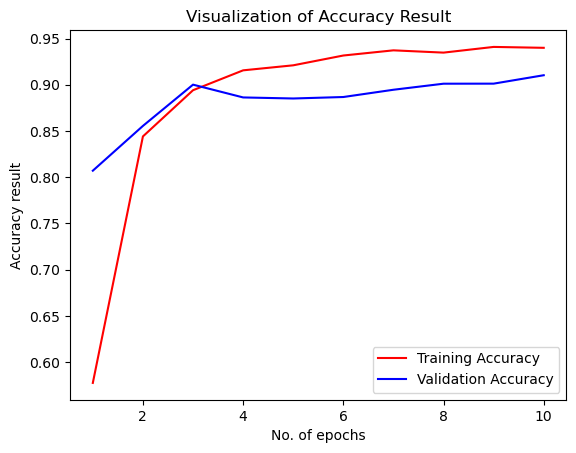

In [39]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label = 'Validation Accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy result')
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [41]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [42]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid', 
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [43]:
y_pred = cnn.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 246s 447ms/step


In [44]:
y_pred, y_pred.shape

(array([[9.99250531e-01, 5.32064037e-09, 2.02328132e-09, ...,
         4.84148316e-18, 8.36697722e-14, 5.22402488e-16],
        [9.99970496e-01, 1.23157324e-05, 8.49812221e-09, ...,
         1.05653666e-10, 2.20572085e-12, 1.77510306e-09],
        [9.99996603e-01, 3.17081330e-08, 5.93513641e-11, ...,
         1.86730066e-21, 1.85475567e-14, 1.09873204e-11],
        ...,
        [1.21468460e-12, 3.29963219e-20, 4.39261676e-08, ...,
         1.02762160e-05, 7.48246290e-15, 9.99054611e-01],
        [1.02287401e-17, 4.13316538e-32, 4.50374618e-15, ...,
         1.67783455e-05, 4.67778432e-21, 9.99725401e-01],
        [5.53471852e-11, 4.79951331e-14, 1.24704864e-11, ...,
         9.73148303e-07, 3.88273429e-06, 9.42286253e-01]], dtype=float32),
 (17572, 38))

In [45]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [46]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [48]:
true_categories = tf.concat([y for x,y in test_set], axis=0)

2024-05-09 09:40:02.676878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [49]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [50]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

![image](matrix.png)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.88      0.90       504
                                 Apple___Black_rot       0.93      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.90      0.93      0.92       440
                                   Apple___healthy       0.88      0.87      0.88       502
                               Blueberry___healthy       0.92      0.92      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.95      0.95       421
                 Cherry_(including_sour)___healthy       0.97      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.85      0.88       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.92      0.

In [54]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[443,  13,   9, ...,   0,   1,   1],
       [  1, 492,   0, ...,   0,   0,   0],
       [  0,   0, 410, ...,   0,   0,   1],
       ...,
       [  0,   0,   1, ..., 477,   0,   0],
       [  0,   0,   0, ...,   0, 431,   0],
       [  0,   0,   0, ...,   0,   1, 401]])

## Confusion Matrix Visualization 

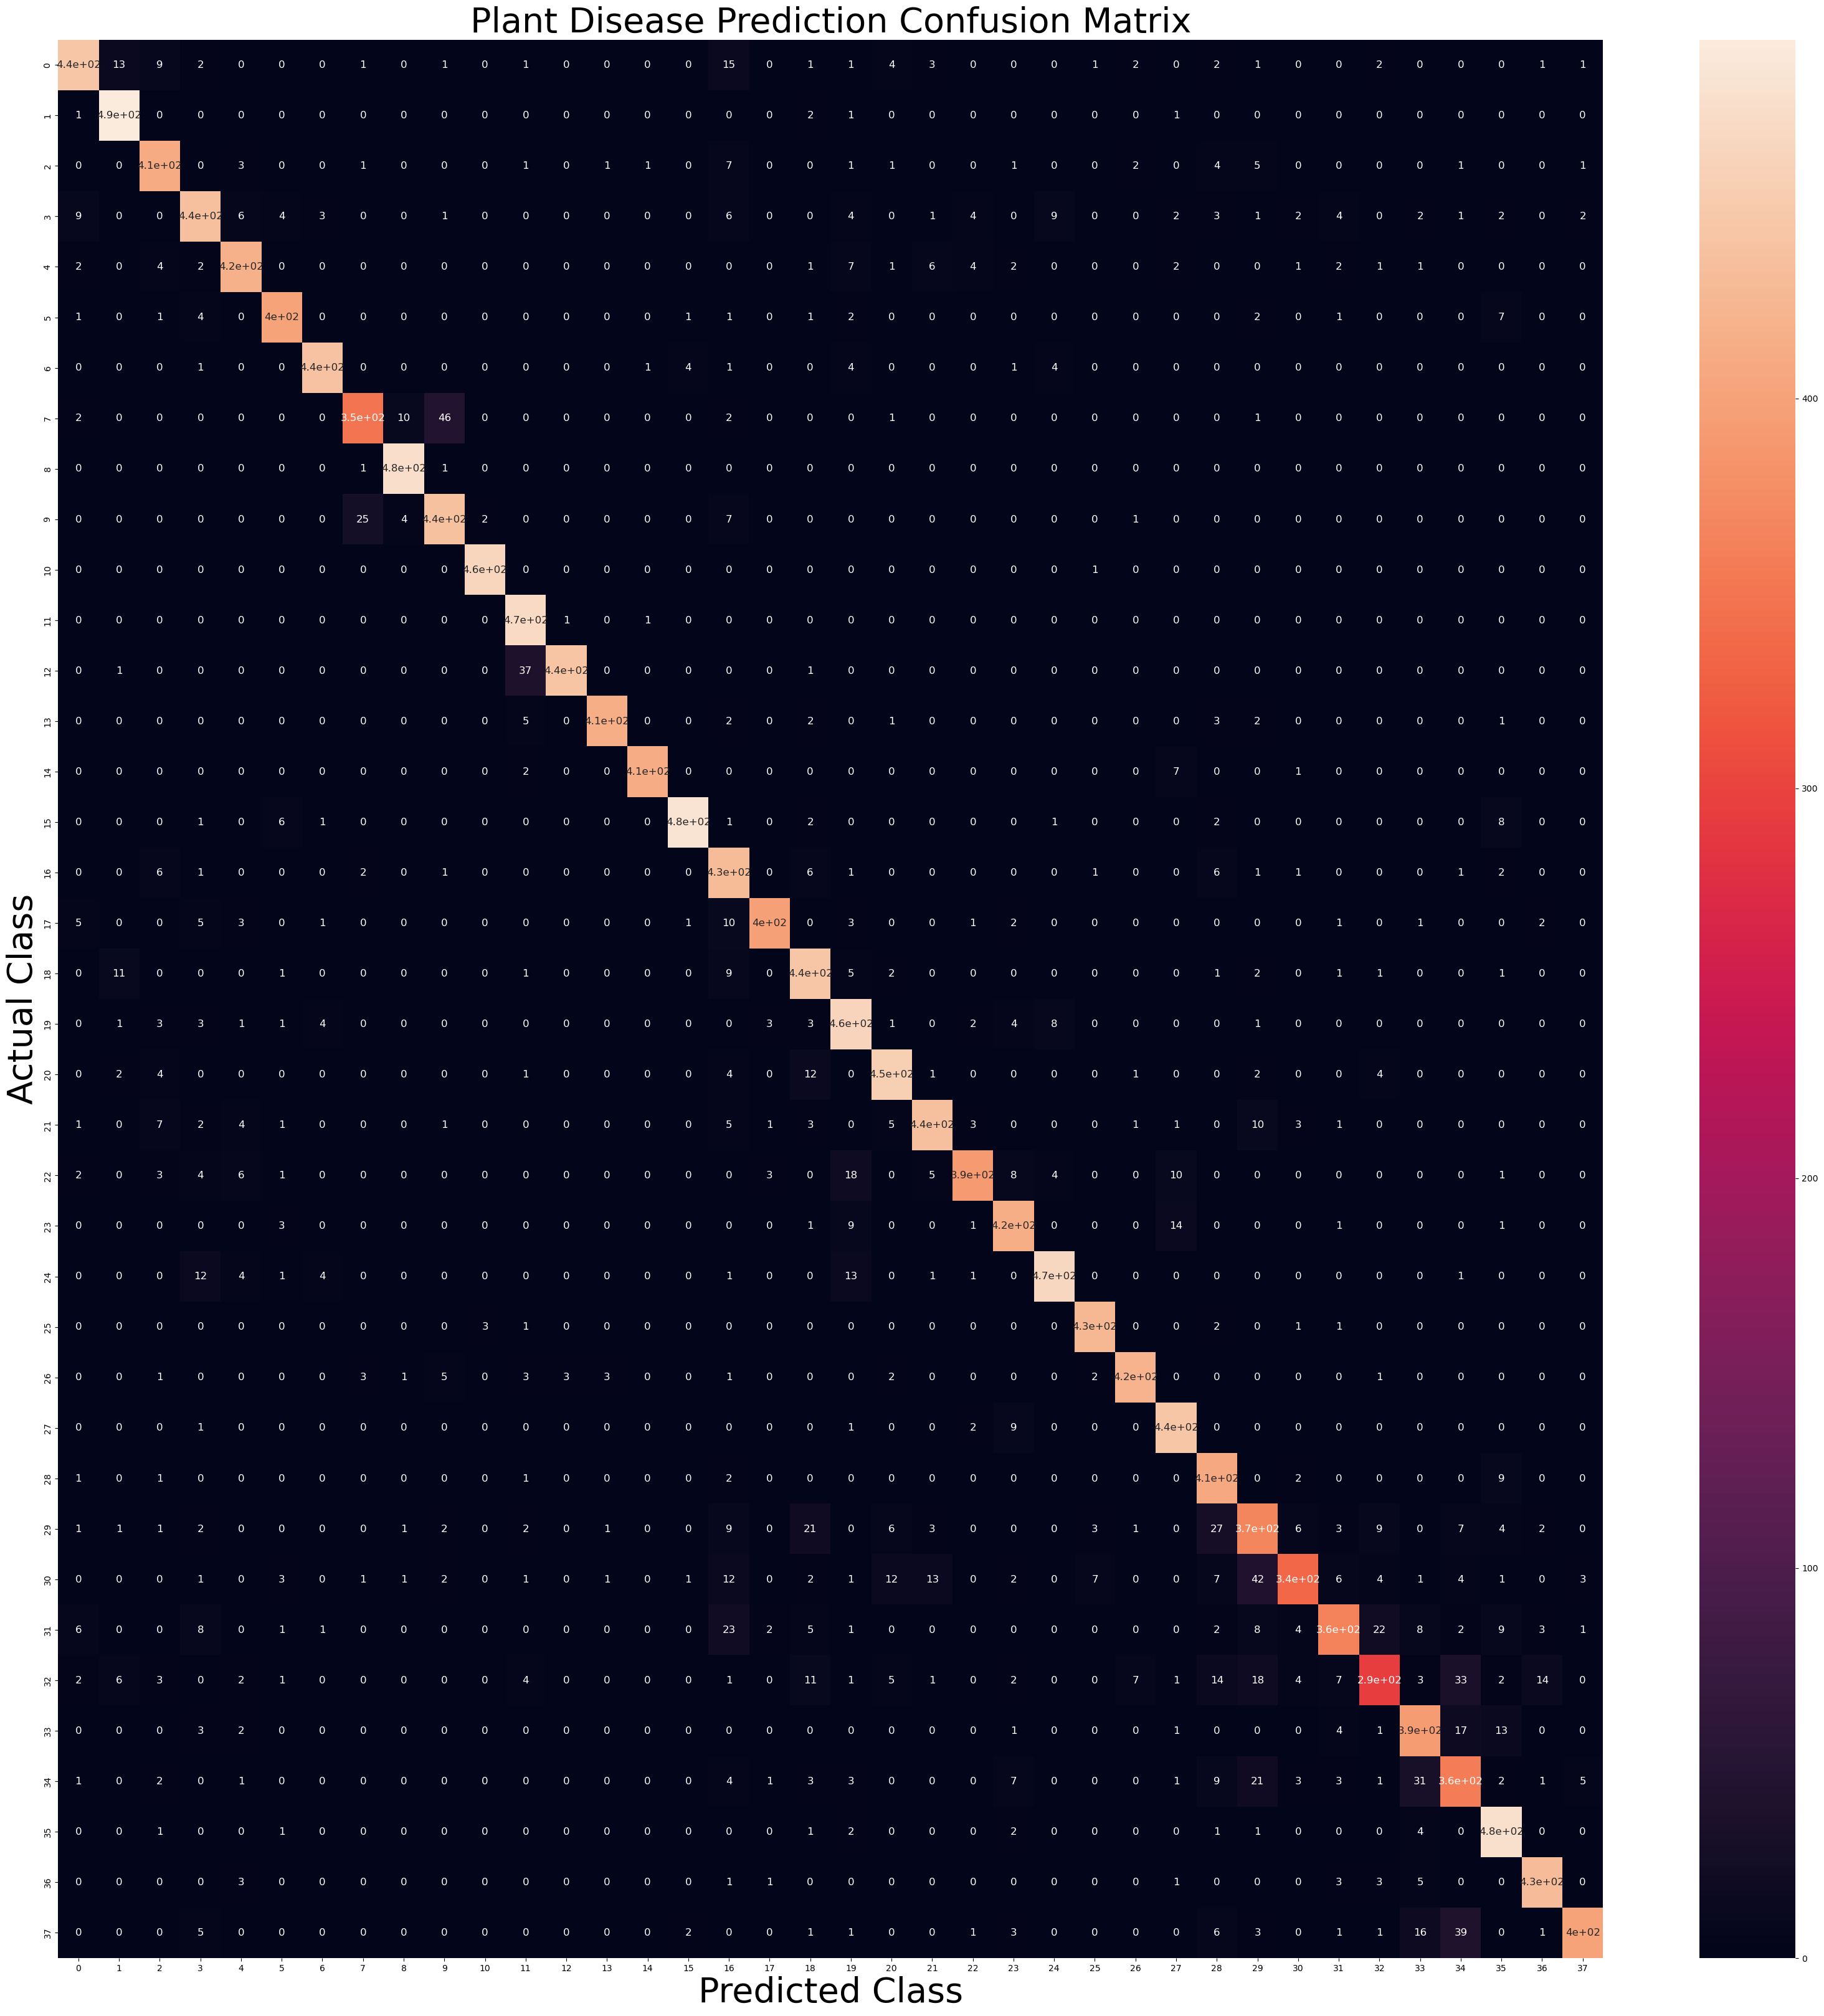

In [66]:
plt.figure(figsize=(40, 40))

sns.heatmap(cm, annot=True, annot_kws={'size':12})
plt.xlabel("Predicted Class", fontsize=40)
plt.ylabel("Actual Class", fontsize=40)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=40)
plt.show()